# Blending and Pasting imgs

In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(121)
    ax.imshow(img,cmap)
def load():
    img1 = cv2.imread("../Test_Photo/all_character.jpg")
    img2 = cv2.imread("../Test_Photo/watermark_marvel.png")
    img1_c = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
    img2_c = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
    return img1_c,img2_c

In [88]:
img1,img2 = load()

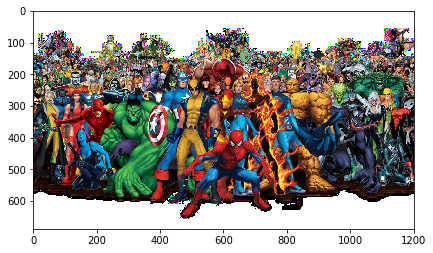

In [89]:
display(img1)

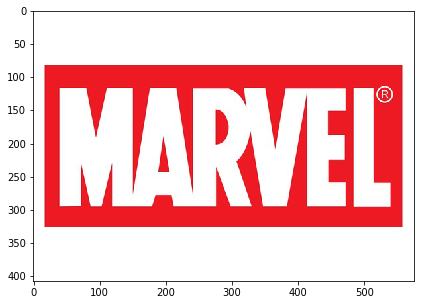

In [90]:
display(img2)

In [91]:
print(img1.shape)
print(img2.shape)

(688, 1200, 3)
(408, 575, 3)


#### 先練習把兩張一樣大小的照片混在一起

In [92]:
# cv2.resize
img1 = cv2.resize(img1,(1200,1200))
img1.shape

(1200, 1200, 3)

In [93]:
img2 = cv2.resize(img2,(1200,1200))
img2.shape

(1200, 1200, 3)

#### 當照片大小都相同後, 我們可以透過相方的公式將兩張照片和再一起
$$  img1 * \alpha  + img2 * \beta  + \gamma $$

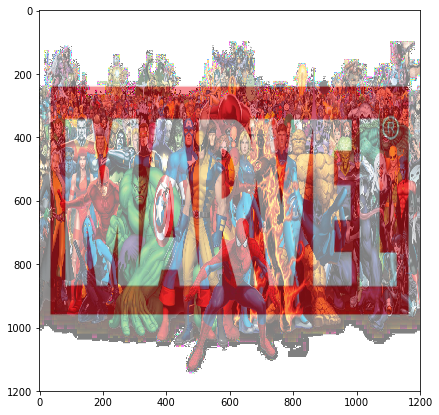

In [94]:
# 我們可以調整 alpha 與 beta來決定照片的淺深
blended = cv2.addWeighted(img1,0.5,img2,0.5,0)
display(blended,"gray")

#### 上面的方法雖然簡單, 但是因為照片通常不會是同樣的大小, 所以以下的範例會是將兩張不同大小的照片重疊

In [95]:
img1 , img2 = load()

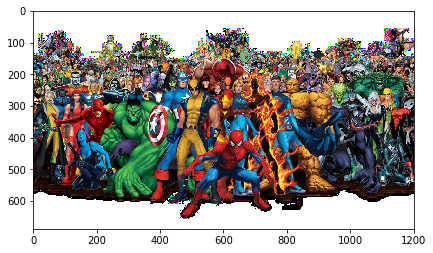

In [96]:
display(img1)

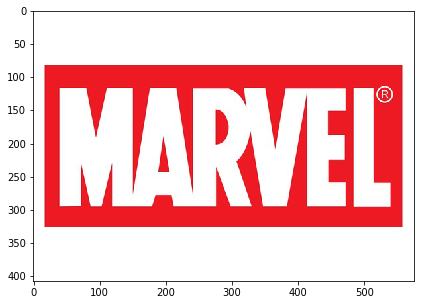

In [97]:
display(img2)

In [98]:
img1.shape

(688, 1200, 3)

In [99]:
img2.shape

(408, 575, 3)

#### 目前我們已知照片的大小了, 其實可以很簡單的透過將特定區快的np array取代掉就完成了照片重疊的方式

In [173]:
img1_copy = img1.copy()
print(img1_copy.shape)
img2 = cv2.resize(img2,(300,300))
img2.shape

(688, 1200, 3)


(300, 300, 3)

In [174]:
img1_copy[388:688,200:500] = img2

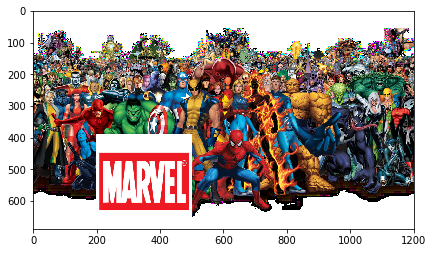

In [175]:
display(img1_copy)

#### 這樣就完成了兩張不同大小的圖片重疊, 但其實我們想要的將img2的白色部分去除. 並將water mark貼上去. 接下來就要介紹關於Mask的方式, 就可以完成我們想要做的部分

In [183]:
img1, img2 = load()
img2 = cv2.resize(img2,(600,300))
print(img2.shape)

(300, 600, 3)


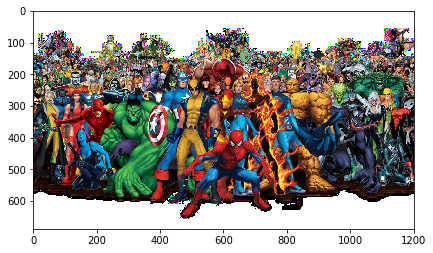

In [184]:
display(img1)

#### 我們要先找尋我們想要結合的位子,又稱作為ROI(Region of Interest).有點像是上一個方式一樣,找尋我們想要將圖片貼上去的位子

In [185]:
img1.shape

(688, 1200, 3)

388


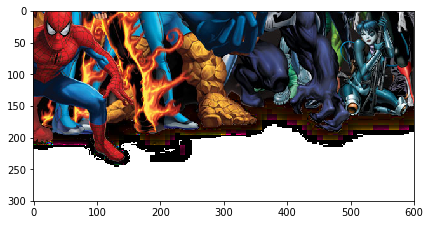

In [198]:
x_offset = 688-300
y_offset = 1200 - 600
print(x_offset)
region_of_interest = img1[x_offset:688,y_offset:1200]
display(region_of_interest)

#### 選好地方後,我們就要開始建立我們的Mask.
#### Mask的定義是什麼？在網路上查詢的介紹是如果在某張Image上套上Mask的話,除了Mask對應的圖片的位子會被保留, 其餘的則是會被換成0
#### [Reference](https://codeyarns.com/2015/08/20/how-to-apply-mask-in-opencv/)

(300, 600)
uint8


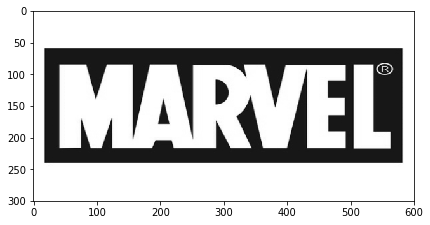

In [188]:
# 先將照片轉換成灰色的
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
display(img2gray,"gray")
print(img2gray.shape)
print(img2gray.dtype)

In [189]:
mask_inverse = cv2.bitwise_not(img2gray)
mask_inverse.shape
print(mask_inverse.dtype)
# display(mask_inverse,"gray")

uint8


In [190]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inverse)
# display(fg)
fg.shape

(300, 600, 3)

#### 建立好Mask後, 我們要套在我們先前抓的region_of_interest裡面

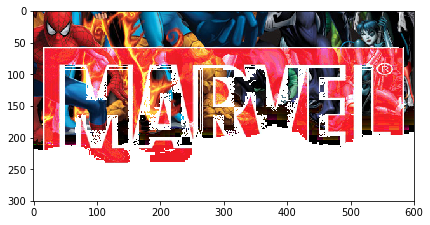

In [191]:
Get_region_of_interest = cv2.bitwise_or(region_of_interest,fg)
display(Get_region_of_interest)

In [192]:
Get_region_of_interest.shape

(300, 600, 3)

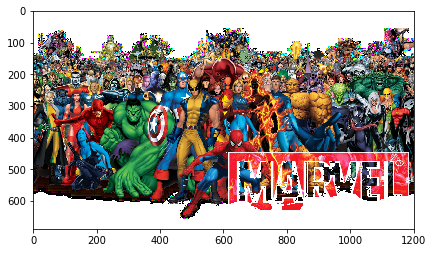

In [203]:
large_img = img1
small_img = Get_region_of_interest

large_img[x_offset:x_offset+small_img.shape[0],y_offset:y_offset+small_img.shape[1]] = Get_region_of_interest

display(large_img)